In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
players = pd.read_csv('./data/players/players_15.csv')
rankings = pd.read_csv('./data/fifa_rankings.csv')

C:\Users\gabipana\AppData\Local\Temp\ipykernel_19924\1891390649.py:1: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('./data/players/players_15.csv')


In [3]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,...,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,...,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,...,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,...,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1363/60.png,https://cdn.sofifa.net/flags/se.png
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,...,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16150,220806,https://sofifa.com/player/220806/ellis-redman/...,E. Redman,Ellis Redman,CB,41,61,20000.0,2000.0,17,...,41,41,41,40,10,https://cdn.sofifa.net/players/220/806/15_120.png,https://cdn.sofifa.net/teams/112254/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-wls.png
16151,225509,https://sofifa.com/player/225509/aaron-collins...,A. Collins,Aaron Graham John Collins,ST,41,50,30000.0,2000.0,17,...,31,31,31,32,14,https://cdn.sofifa.net/players/225/509/15_120.png,https://cdn.sofifa.net/teams/112254/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-wls.png
16152,201197,https://sofifa.com/player/201197/paul-tisdale/...,P. Tisdale,Paul Tisdale,"CM, CAM",40,40,NaN,2000.0,41,...,33,33,33,34,10,https://cdn.sofifa.net/players/201/197/15_120.png,https://cdn.sofifa.net/teams/143/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/mt.png
16153,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,P. Żemło,Piotr Żemło,"LM, LB",40,50,15000.0,2000.0,18,...,53-3,53-3,53-3,51-1,12,https://cdn.sofifa.net/players/217/591/15_120.png,https://cdn.sofifa.net/teams/1873/60.png,https://cdn.sofifa.net/flags/pl.png,NaN,https://cdn.sofifa.net/flags/pl.png


In [4]:
players.info()
players.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(17), int64(43), object(50)
memory usage: 13.6+ MB


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,16155.000000,16155.000000,16155.000000,1.584400e+04,15916.000000,16155.000000,16155.000000,16155.000000,15916.000000,15916.000000,...,0.0,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,1775.000000
mean,189298.540699,63.830393,68.350108,1.081706e+06,13252.513194,24.776230,181.083627,75.474342,39905.174353,1.378424,...,NaN,45.009037,47.656639,45.885918,15.869514,15.511668,15.354875,15.504735,15.998514,43.865915
std,39762.547872,7.169896,6.580610,2.842704e+06,23608.922510,4.625321,6.618974,6.891796,52050.202038,0.736796,...,NaN,17.915206,18.743105,18.145497,17.576799,16.414173,16.010498,16.585081,17.983209,8.484421
min,2.000000,40.000000,40.000000,1.000000e+03,2000.000000,16.000000,155.000000,50.000000,1.000000,1.000000,...,NaN,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000
25%,178042.500000,59.000000,64.000000,1.300000e+05,2000.000000,21.000000,176.000000,70.000000,379.000000,1.000000,...,NaN,25.000000,25.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,39.000000
50%,200844.000000,64.000000,68.000000,3.500000e+05,5000.000000,24.000000,181.000000,75.000000,1843.000000,1.000000,...,NaN,46.000000,52.000000,49.000000,11.000000,11.000000,11.000000,10.000000,10.000000,44.000000
75%,214349.500000,68.000000,73.000000,8.250000e+05,10000.000000,28.000000,186.000000,80.000000,110398.000000,2.000000,...,NaN,61.000000,64.000000,62.000000,13.000000,14.000000,13.000000,13.000000,13.000000,49.000000
max,254664.000000,93.000000,95.000000,1.005000e+08,550000.000000,44.000000,204.000000,110.000000,113147.000000,4.000000,...,NaN,90.000000,91.000000,95.000000,88.000000,87.000000,92.000000,90.000000,90.000000,66.000000


In [5]:
numeric_cols = players.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = players.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision

In [16]:
keepcolumns = ['short_name', 'long_name', 'player_positions', 'age', 'dob', 'nationality_name', 
               'overall', 'potential', 'value_eur', 'wage_eur', 'height_cm', 'weight_kg', 'preferred_foot',
               'club_name', 'league_name', 'club_jersey_number', 'club_position', 
               'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
               'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_flag_url']

In [17]:
players = pd.read_csv('./data/players/players_15.csv', usecols=keepcolumns)

In [18]:
players

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,pace,shooting,passing,dribbling,defending,physic,player_face_url,club_logo_url,club_flag_url,nation_flag_url
0,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,1987-06-24,169,...,93.0,89.0,86.0,96.0,27.0,63.0,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/ar.png
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,1985-02-05,185,...,93.0,93.0,81.0,91.0,32.0,79.0,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/pt.png
2,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,1984-01-23,180,...,93.0,86.0,83.0,92.0,32.0,64.0,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/nl.png
3,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,1981-10-03,195,...,76.0,91.0,81.0,86.0,34.0,86.0,https://cdn.sofifa.net/players/041/236/15_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/se.png
4,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,1986-03-27,193,...,NaN,NaN,NaN,NaN,NaN,NaN,https://cdn.sofifa.net/players/167/495/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/de.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16150,E. Redman,Ellis Redman,CB,41,61,20000.0,2000.0,17,1996-09-26,187,...,66.0,25.0,29.0,30.0,39.0,53.0,https://cdn.sofifa.net/players/220/806/15_120.png,https://cdn.sofifa.net/teams/112254/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/gb-wls.png
16151,A. Collins,Aaron Graham John Collins,ST,41,50,30000.0,2000.0,17,1997-06-01,178,...,64.0,41.0,27.0,35.0,27.0,41.0,https://cdn.sofifa.net/players/225/509/15_120.png,https://cdn.sofifa.net/teams/112254/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/gb-wls.png
16152,P. Tisdale,Paul Tisdale,"CM, CAM",40,40,NaN,2000.0,41,1973-01-14,175,...,38.0,36.0,42.0,45.0,31.0,33.0,https://cdn.sofifa.net/players/201/197/15_120.png,https://cdn.sofifa.net/teams/143/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/mt.png
16153,P. Żemło,Piotr Żemło,"LM, LB",40,50,15000.0,2000.0,18,1995-07-10,190,...,58.0,27.0,35.0,31.0,52.0,68.0,https://cdn.sofifa.net/players/217/591/15_120.png,https://cdn.sofifa.net/teams/1873/60.png,https://cdn.sofifa.net/flags/pl.png,https://cdn.sofifa.net/flags/pl.png


In [19]:
players.info()
players.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   short_name          16155 non-null  object 
 1   long_name           16155 non-null  object 
 2   player_positions    16155 non-null  object 
 3   overall             16155 non-null  int64  
 4   potential           16155 non-null  int64  
 5   value_eur           15844 non-null  float64
 6   wage_eur            15916 non-null  float64
 7   age                 16155 non-null  int64  
 8   dob                 16155 non-null  object 
 9   height_cm           16155 non-null  int64  
 10  weight_kg           16155 non-null  int64  
 11  club_name           15916 non-null  object 
 12  league_name         15916 non-null  object 
 13  club_position       15916 non-null  object 
 14  club_jersey_number  15916 non-null  float64
 15  nationality_name    16155 non-null  object 
 16  pref

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_jersey_number,pace,shooting,passing,dribbling,defending,physic
count,16155.000000,16155.000000,1.584400e+04,15916.000000,16155.000000,16155.000000,16155.000000,15916.000000,14380.000000,14380.000000,14380.000000,14380.000000,14380.000000,14380.000000
mean,63.830393,68.350108,1.081706e+06,13252.513194,24.776230,181.083627,75.474342,19.712868,68.049026,51.582337,55.638665,60.525661,49.896662,64.537830
std,7.169896,6.580610,2.842704e+06,23608.922510,4.625321,6.618974,6.891796,16.455708,10.965779,13.401158,10.725853,10.758680,15.788470,9.700209
min,40.000000,40.000000,1.000000e+03,2000.000000,16.000000,155.000000,50.000000,1.000000,22.000000,22.000000,24.000000,25.000000,21.000000,28.000000
25%,59.000000,64.000000,1.300000e+05,2000.000000,21.000000,176.000000,70.000000,8.000000,62.000000,41.000000,49.000000,54.000000,33.000000,58.000000
50%,64.000000,68.000000,3.500000e+05,5000.000000,24.000000,181.000000,75.000000,17.000000,69.000000,53.000000,56.000000,62.000000,53.000000,65.000000
75%,68.000000,73.000000,8.250000e+05,10000.000000,28.000000,186.000000,80.000000,26.000000,75.000000,62.000000,63.000000,68.000000,63.000000,72.000000
max,93.000000,95.000000,1.005000e+08,550000.000000,44.000000,204.000000,110.000000,99.000000,97.000000,93.000000,91.000000,96.000000,90.000000,91.000000


In [20]:
# columns and number of missing values
num_missing = players.isna().sum()
num_missing[:]

short_name               0
long_name                0
player_positions         0
overall                  0
potential                0
value_eur              311
wage_eur               239
age                      0
dob                      0
height_cm                0
weight_kg                0
club_name              239
league_name            239
club_position          239
club_jersey_number     239
nationality_name         0
preferred_foot           0
pace                  1775
shooting              1775
passing               1775
dribbling             1775
defending             1775
physic                1775
player_face_url          0
club_logo_url          239
club_flag_url          239
nation_flag_url          0
dtype: int64

<AxesSubplot: >

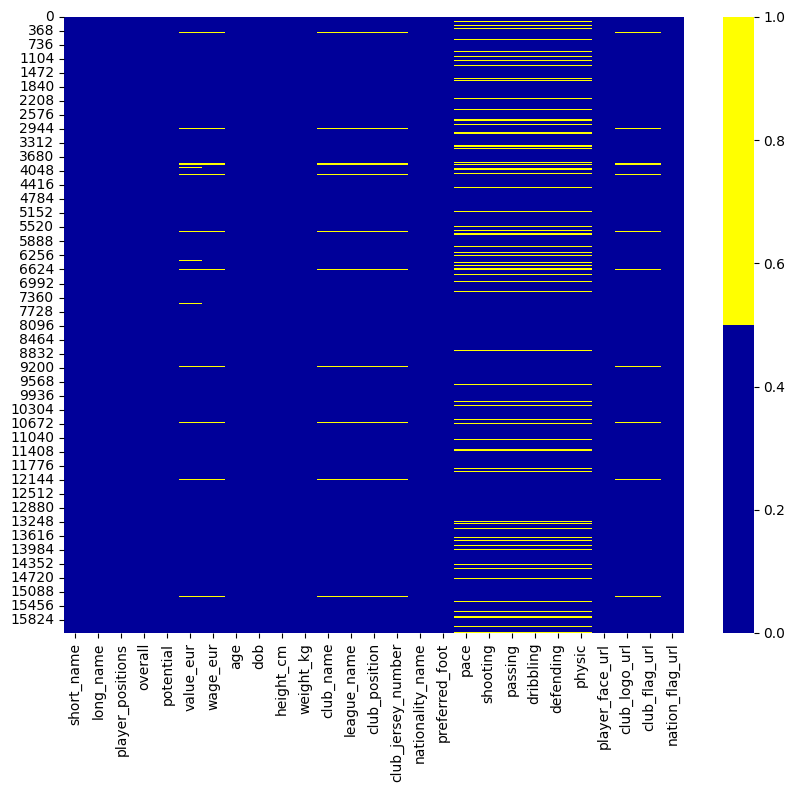

In [21]:
# Heatmap to visualize missing data
plt.figure(figsize=(10,8))

# first 30 columns
cols = players.columns[:]
colours =['#000099', '#ffff00']
sns.heatmap(players[cols].isna(), cmap=sns.color_palette(colours))

In [25]:
players['nationality_name'].value_counts()

England      1627
Spain        1051
France        958
Argentina     867
Italy         795
             ... 
Guyana          1
Bahrain         1
Guam            1
Oman            1
Indonesia       1
Name: nationality_name, Length: 149, dtype: int64

In [26]:
players.nlargest(10,'overall')

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,pace,shooting,passing,dribbling,defending,physic,player_face_url,club_logo_url,club_flag_url,nation_flag_url
0,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,1987-06-24,169,...,93.0,89.0,86.0,96.0,27.0,63.0,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/ar.png
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,1985-02-05,185,...,93.0,93.0,81.0,91.0,32.0,79.0,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/pt.png
2,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,1984-01-23,180,...,93.0,86.0,83.0,92.0,32.0,64.0,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/nl.png
3,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,1981-10-03,195,...,76.0,91.0,81.0,86.0,34.0,86.0,https://cdn.sofifa.net/players/041/236/15_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/se.png
4,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,1986-03-27,193,...,NaN,NaN,NaN,NaN,NaN,NaN,https://cdn.sofifa.net/players/167/495/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/de.png
5,Iniesta,Andrés Iniesta Luján,"CM, LW",89,89,36000000.0,250000.0,30,1984-05-11,170,...,75.0,72.0,89.0,91.0,59.0,63.0,https://cdn.sofifa.net/players/000/041/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/es.png
6,L. Suárez,Luis Alberto Suárez Díaz,"ST, CF",89,91,49500000.0,300000.0,27,1987-01-24,181,...,83.0,87.0,79.0,88.0,42.0,79.0,https://cdn.sofifa.net/players/176/580/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/uy.png
7,R. van Persie,Robin van Persie,ST,88,88,40500000.0,230000.0,30,1983-08-06,187,...,74.0,90.0,82.0,83.0,33.0,68.0,https://cdn.sofifa.net/players/007/826/15_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/nl.png
8,B. Schweinsteiger,Bastian Schweinsteiger,"CM, CDM",88,88,39000000.0,200000.0,29,1984-08-01,183,...,61.0,81.0,85.0,82.0,78.0,80.0,https://cdn.sofifa.net/players/121/944/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/de.png
9,F. Ribéry,Franck Bilal Ribéry,LM,88,88,33000000.0,200000.0,31,1983-04-07,170,...,89.0,78.0,85.0,92.0,29.0,62.0,https://cdn.sofifa.net/players/156/616/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/fr.png


In [69]:
top20 = players.groupby("nationality_name")["overall"].nlargest(20).index

In [70]:
len(top20)

1860

In [71]:
idx=[]
for index in range(len(top20)):
    idx.append(top20[index][1])

In [79]:
top20_players_each_nation = players.iloc[idx]

In [80]:
top20_players_each_nation

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,pace,shooting,passing,dribbling,defending,physic,player_face_url,club_logo_url,club_flag_url,nation_flag_url
549,L. Cana,Lorik Agim Cana,CB,77,77,3800000.0,70000.0,30,1983-07-27,186,...,61.0,53.0,63.0,55.0,75.0,82.0,https://cdn.sofifa.net/players/134/956/15_120.png,https://cdn.sofifa.net/teams/46/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/al.png
2162,E. Berisha,Etrit Berisha,GK,72,77,2500000.0,25000.0,25,1989-03-10,194,...,NaN,NaN,NaN,NaN,NaN,NaN,https://cdn.sofifa.net/players/189/296/15_120.png,https://cdn.sofifa.net/teams/46/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/al.png
2447,B. Berisha,Besart Berisha,ST,71,71,1700000.0,40000.0,28,1985-07-29,185,...,74.0,68.0,55.0,69.0,33.0,79.0,https://cdn.sofifa.net/players/157/707/15_120.png,https://cdn.sofifa.net/teams/111397/60.png,https://cdn.sofifa.net/flags/au.png,https://cdn.sofifa.net/flags/al.png
2548,M. Mavraj,Mërgim Mavraj,CB,71,71,1400000.0,25000.0,28,1986-06-09,190,...,53.0,30.0,53.0,47.0,72.0,72.0,https://cdn.sofifa.net/players/182/713/15_120.png,https://cdn.sofifa.net/teams/31/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/al.png
2619,M. Basha,Migjen Basha,"CM, CDM",71,73,1700000.0,25000.0,27,1987-01-05,180,...,66.0,59.0,71.0,68.0,64.0,71.0,https://cdn.sofifa.net/players/189/779/15_120.png,https://cdn.sofifa.net/teams/54/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/al.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,D. Gwaze,Dzikamai Andre Gwaze,"RM, CAM",61,64,240000.0,4000.0,25,1989-04-22,179,...,92.0,58.0,54.0,63.0,38.0,57.0,https://cdn.sofifa.net/players/222/138/15_120.png,https://cdn.sofifa.net/teams/420/60.png,https://cdn.sofifa.net/flags/pl.png,https://cdn.sofifa.net/flags/zw.png
13920,M. Bonne,Macauley Miles Bonne,ST,56,70,80000.0,2000.0,18,1995-10-26,185,...,77.0,57.0,35.0,52.0,28.0,56.0,https://cdn.sofifa.net/players/213/634/15_120.png,https://cdn.sofifa.net/teams/1935/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/zw.png
13977,S. Songani,Silas Dylan Songani,"RM, ST",56,62,110000.0,3000.0,25,1989-06-28,170,...,72.0,55.0,52.0,61.0,26.0,53.0,https://cdn.sofifa.net/players/218/170/15_120.png,https://cdn.sofifa.net/teams/1447/60.png,https://cdn.sofifa.net/flags/dk.png,https://cdn.sofifa.net/flags/zw.png
14067,M. Nakamba,Marvelous Nakamba,CAM,56,62,90000.0,3000.0,20,1994-01-19,177,...,76.0,43.0,52.0,57.0,46.0,60.0,https://cdn.sofifa.net/players/222/994/15_120.png,https://cdn.sofifa.net/teams/1909/60.png,https://cdn.sofifa.net/flags/nl.png,https://cdn.sofifa.net/flags/zw.png


In [81]:
# columns and number of missing values
num_missing = top20_players_each_nation.isna().sum()
num_missing[:]

short_name              0
long_name               0
player_positions        0
overall                 0
potential               0
value_eur             124
wage_eur              122
age                     0
dob                     0
height_cm               0
weight_kg               0
club_name             122
league_name           122
club_position         122
club_jersey_number    122
nationality_name        0
preferred_foot          0
pace                  179
shooting              179
passing               179
dribbling             179
defending             179
physic                179
player_face_url         0
club_logo_url         122
club_flag_url         122
nation_flag_url         0
dtype: int64

<AxesSubplot: >

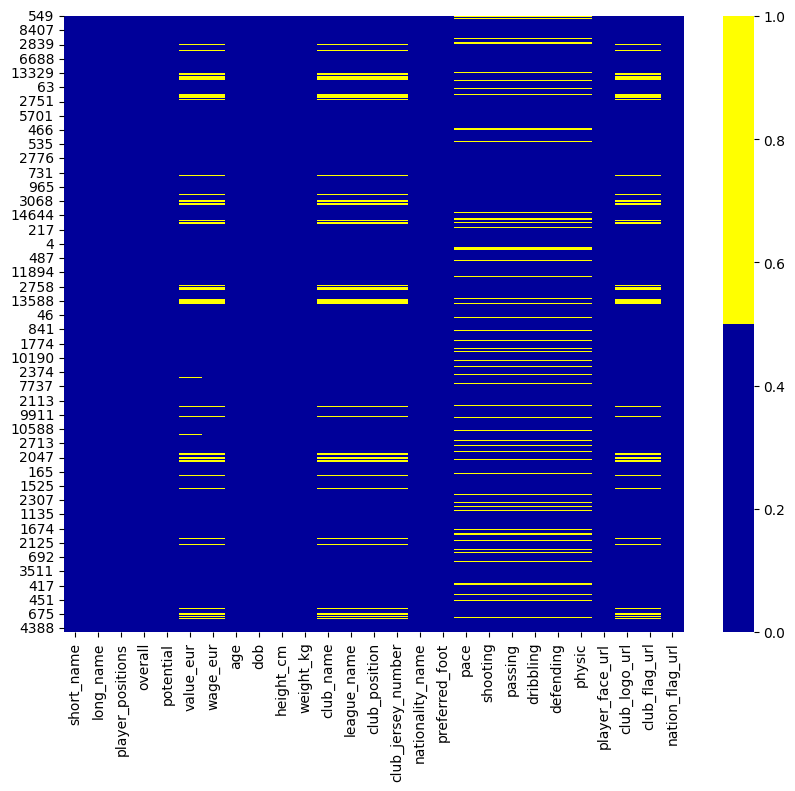

In [82]:
# Heatmap to visualize missing data
plt.figure(figsize=(10,8))

# first 30 columns
cols = top20_players_each_nation.columns[:]
colours =['#000099', '#ffff00']
sns.heatmap(top20_players_each_nation[cols].isna(), cmap=sns.color_palette(colours))

In [83]:
top20_players_each_nation['nationality_name'].value_counts()

Albania        20
Romania        20
Peru           20
Poland         20
Greece         20
               ..
Guyana          1
Oman            1
Guam            1
Saint Lucia     1
Fiji            1
Name: nationality_name, Length: 149, dtype: int64

In [84]:
fifa_teams = pd.read_csv('./data/fifa_teams.csv')
fifa_teams.head()

,team,code,country,confederation
0,Afghanistan,AFG,Afghanistan,AFC
1,Albania,ALB,Albania,UEFA
2,Algeria,ALG,Algeria,CAF
3,American Samoa,ASA,American Samoa,OFC
4,Andorra,AND,Andorra,UEFA


In [86]:
print(list(set(fifa_teams['team'].unique()) - set(top20_players_each_nation['nationality_name'].unique())))

['American Samoa', 'Ethiopia', 'Bhutan', 'Vanuatu', 'Rwanda', 'Singapore', 'Chad', 'Pakistan', 'Tahiti', 'Dominican Republic', 'Namibia', 'British Virgin Islands', 'Ivory Coast', 'China', 'Mauritius', 'Bahamas', 'Nepal', 'Tanzania', 'Eritrea', 'Djibouti', 'Puerto Rico', 'DR Congo', 'Guinea-Bissau', 'Aruba', 'Dominica', 'Solomon Islands', 'Eswatini', 'Somalia', 'San Marino', 'Timor-Leste', 'U.S. Virgin Islands', 'Chinese Taipei', 'North Korea', 'El Salvador', 'Saint Vincent and the Grenadines', 'Seychelles', 'Turks and Caicos Islands', 'Malaysia', 'São Tomé and Príncipe', 'Cape Verde', 'Papua New Guinea', 'Cayman Islands', 'Samoa', 'Qatar', 'Yemen', 'South Sudan', 'Lesotho', 'Brunei', 'Anguilla', 'Belize', 'Cook Islands', 'Laos', 'Curaçao', 'Macau', 'Mongolia', 'Nicaragua', 'Hong Kong', 'Sri Lanka', 'United Arab Emirates', 'Tajikistan', 'Maldives', 'Tonga', 'Myanmar', 'Bangladesh', 'Botswana', 'Malawi', 'South Korea', 'Andorra', 'Afghanistan', 'Vietnam']


In [87]:
print(list(set(top20_players_each_nation['nationality_name'].unique()) -set(fifa_teams['team'].unique()) ))

['Cape Verde Islands', 'China PR', 'Congo DR', 'Guinea Bissau', "Côte d'Ivoire", 'Curacao', 'Korea DPR', 'Korea Republic']


In [89]:
nationalities_to_be_modified = list(set(top20_players_each_nation['nationality_name'].unique()) -set(fifa_teams['team'].unique()))

In [90]:
modified_into = ['Cape Verde', 'China', 'DR Congo', 'Guinea-Bissau', 'Ivory Coast', 'Curaçao', 'North Korea', 'South Korea' ]

In [92]:
top20_players_each_nation_modif = top20_players_each_nation.copy()

In [93]:
top20_players_each_nation_modif['nationality_name'] = top20_players_each_nation_modif['nationality_name'].replace(nationalities_to_be_modified, modified_into)

In [94]:
top20_players_each_nation_modif

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,pace,shooting,passing,dribbling,defending,physic,player_face_url,club_logo_url,club_flag_url,nation_flag_url
549,L. Cana,Lorik Agim Cana,CB,77,77,3800000.0,70000.0,30,1983-07-27,186,...,61.0,53.0,63.0,55.0,75.0,82.0,https://cdn.sofifa.net/players/134/956/15_120.png,https://cdn.sofifa.net/teams/46/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/al.png
2162,E. Berisha,Etrit Berisha,GK,72,77,2500000.0,25000.0,25,1989-03-10,194,...,NaN,NaN,NaN,NaN,NaN,NaN,https://cdn.sofifa.net/players/189/296/15_120.png,https://cdn.sofifa.net/teams/46/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/al.png
2447,B. Berisha,Besart Berisha,ST,71,71,1700000.0,40000.0,28,1985-07-29,185,...,74.0,68.0,55.0,69.0,33.0,79.0,https://cdn.sofifa.net/players/157/707/15_120.png,https://cdn.sofifa.net/teams/111397/60.png,https://cdn.sofifa.net/flags/au.png,https://cdn.sofifa.net/flags/al.png
2548,M. Mavraj,Mërgim Mavraj,CB,71,71,1400000.0,25000.0,28,1986-06-09,190,...,53.0,30.0,53.0,47.0,72.0,72.0,https://cdn.sofifa.net/players/182/713/15_120.png,https://cdn.sofifa.net/teams/31/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/al.png
2619,M. Basha,Migjen Basha,"CM, CDM",71,73,1700000.0,25000.0,27,1987-01-05,180,...,66.0,59.0,71.0,68.0,64.0,71.0,https://cdn.sofifa.net/players/189/779/15_120.png,https://cdn.sofifa.net/teams/54/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/al.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,D. Gwaze,Dzikamai Andre Gwaze,"RM, CAM",61,64,240000.0,4000.0,25,1989-04-22,179,...,92.0,58.0,54.0,63.0,38.0,57.0,https://cdn.sofifa.net/players/222/138/15_120.png,https://cdn.sofifa.net/teams/420/60.png,https://cdn.sofifa.net/flags/pl.png,https://cdn.sofifa.net/flags/zw.png
13920,M. Bonne,Macauley Miles Bonne,ST,56,70,80000.0,2000.0,18,1995-10-26,185,...,77.0,57.0,35.0,52.0,28.0,56.0,https://cdn.sofifa.net/players/213/634/15_120.png,https://cdn.sofifa.net/teams/1935/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/zw.png
13977,S. Songani,Silas Dylan Songani,"RM, ST",56,62,110000.0,3000.0,25,1989-06-28,170,...,72.0,55.0,52.0,61.0,26.0,53.0,https://cdn.sofifa.net/players/218/170/15_120.png,https://cdn.sofifa.net/teams/1447/60.png,https://cdn.sofifa.net/flags/dk.png,https://cdn.sofifa.net/flags/zw.png
14067,M. Nakamba,Marvelous Nakamba,CAM,56,62,90000.0,3000.0,20,1994-01-19,177,...,76.0,43.0,52.0,57.0,46.0,60.0,https://cdn.sofifa.net/players/222/994/15_120.png,https://cdn.sofifa.net/teams/1909/60.png,https://cdn.sofifa.net/flags/nl.png,https://cdn.sofifa.net/flags/zw.png


In [95]:
top20_players_each_nation_modif.to_csv('./data/fifa_players/top20_fifa_players_2015.csv', index=False)